In [1]:
import matplotlib.pyplot as plt
import numpy as np

from models import *
from utils import *
from data import *

In [2]:
ts = Airline(path=None, normalize=True)
data = ts.data
X_train, y_train, X_val, y_val, X_test, y_test = windowing(data, 7)

In [3]:
LR = RandomForestForecaster()
LR.fit(X_train, y_train)

📊 Validation Results
  RMSE : 101.67
  MAE  : 86.05
  MAPE : 23.63%

ℹ️ Test Results
  RMSE : 201.29
  MAE  : 185.51
  MAPE : 40.38%


c:\Users\ilias\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ilias\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


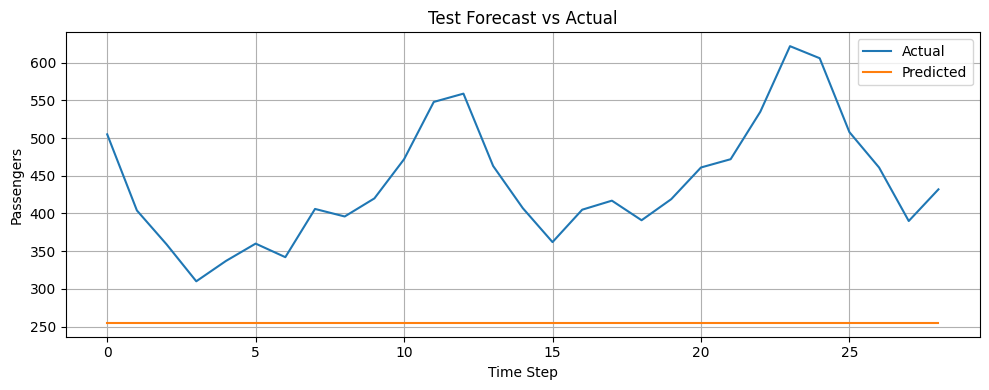

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 4. Predict one window at a time (vectorized)
y_val_pred  = np.array([LR.predict(w) for w in X_val])
y_test_pred = np.array([LR.predict(w) for w in X_test])

# helper to go back to original scale
def inv(x_1d):
    # x_1d: shape (n_samples,)
    x2d = x_1d.reshape(-1, 1)              # → (n_samples, 1)
    return ts.inverse_transform(x2d).ravel()  # → back to (n_samples,)

# 5. Inverse‑transform predictions and truth
y_val_real      = inv(y_val)
y_val_pred_real = inv(y_val_pred)

y_test_real      = inv(y_test)
y_test_pred_real = inv(y_test_pred)

# 6. Define MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 7. Print evaluation metrics
print("📊 Validation Results")
print(f"  RMSE : {mean_squared_error(y_val_real,  y_val_pred_real,  squared=False):.2f}")
print(f"  MAE  : {mean_absolute_error(   y_val_real,  y_val_pred_real):.2f}")
print(f"  MAPE : {mape(                    y_val_real,  y_val_pred_real):.2f}%\n")

print("ℹ️ Test Results")
print(f"  RMSE : {mean_squared_error(y_test_real, y_test_pred_real, squared=False):.2f}")
print(f"  MAE  : {mean_absolute_error(   y_test_real, y_test_pred_real):.2f}")
print(f"  MAPE : {mape(                    y_test_real, y_test_pred_real):.2f}%")

# 8. Plot
plt.figure(figsize=(10, 4))
plt.plot(y_test_real,      label="Actual")
plt.plot(y_test_pred_real, label="Predicted")
plt.title("Test Forecast vs Actual")
plt.xlabel("Time Step")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()